# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)


---
## 2. Load data

In [3]:
df = pd.read_csv('./clean_data_after_eda.csv')
price_df = pd.read_csv('price_data.csv')

In [4]:
df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   0.000908                   2.086294   
1                   0.000000                   0.009482   
2                   0.000000                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
1               0.000000                   0.000000              0.009485   
2               0.000000                   0.000000              0.000004   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01              44.236702      1  
1       1.217891e-03               0.000000      0  
2       9.450150e-08               0.000000      0  

[3 rows x 44 columns]

In [5]:
# Client data description
df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  ...  var_6m_price_off_peak_var  \
count                 14606.000000  ...               14606.000000   
mean                     43.130056  ...                   0.000025   
std                       4.485988  ...                   0.000204   
min                       0.000000  ...                   0.000000   
25%                      40.606701  ...                   0.000003   
50%                      44.311378  ...                   0.000004   
75%                      44.311378  ...                   0.000011   
max                      59.266378  ...                   0.005543   

       var_6m_price_peak_var  var_6m_price_mid_peak_var  \
count           1.460600e+04               1.460600e+04   
mean            3.304264e-05               1.406015e-05   
std             2.231791e-04               1.273170e-04   
min             0.000000e+00               0.000000e+00   
25%             0.000000e+00               0.000000e+00   
50%             9.450150e-08               0.000000e+00   
75%             2.896760e-06               4.860000e-10   
max             4.791197e-03               2.415288e-03   

       var_6m_price_off_peak_fix  var_6m_price_peak_fix  \
count               14606.000000           14606.000000   
mean                    0.922810               1.460247   
std                    18.218286              13.760009   
min                     0.000000               0.000000   
25%                     0.000000               0.000000   
50%                     0.000000               0.000000   
75%                     0.007962               0.000000   
max                   525.988881             399.471115   

       var_6m_price_mid_peak_fix  var_6m_price_off_peak  var_6m_price_peak  \
count               14606.000000           14606.000000       1.460600e+04   
mean                    0.634413               0.922835       1.460280e+00   
std                     5.895346              18.218452       1.376010e+01   
min

---

## 3. Feature engineering

### Client data

In [6]:
# Convert date columns to datetime
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')

# Display the number of rows and columns
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")

The DataFrame has 14606 rows and 44 columns.


In [7]:
# Extract numeric features from datetime columns
for col in date_cols:
    df[f'year_{col.split("_")[1]}'] = df[col].dt.year
    df[f'month_{col.split("_")[1]}'] = df[col].dt.month
    df[f'day_{col.split("_")[1]}'] = df[col].dt.day
    df[f'day_of_year_{col.split("_")[1]}'] = df[col].dt.dayofyear

# Display the column names
print(f"Column names:{df.columns}")

# Display the number of rows and columns
print(f"The Client DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")

Column names:Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fi

In [8]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    days = time_delta.dt.days
    months = (days / 30).astype(int)  # Assuming 30 days per month for simplicity
    return months

# Create reference date
reference_date = pd.to_datetime('2016-01-01')

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')


In [9]:
# Check the number of unique values in each column
print("Number of unique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

# Identify columns with only 1 unique value
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]

Number of unique values in each column:
id: 14606
channel_sales: 8
cons_12m: 11065
cons_gas_12m: 2112
cons_last_month: 4751
date_activ: 1796
date_end: 368
date_modif_prod: 2129
date_renewal: 386
forecast_cons_12m: 13993
forecast_cons_year: 4218
forecast_discount_energy: 12
forecast_meter_rent_12m: 3528
forecast_price_energy_off_peak: 516
forecast_price_energy_peak: 329
forecast_price_pow_off_peak: 41
has_gas: 2
imp_cons: 7752
margin_gross_pow_ele: 2391
margin_net_pow_ele: 2391
nb_prod_act: 10
net_margin: 11965
num_years_antig: 13
origin_up: 6
pow_max: 698
var_year_price_off_peak_var: 4674
var_year_price_peak_var: 2696
var_year_price_mid_peak_var: 1893
var_year_price_off_peak_fix: 885
var_year_price_peak_fix: 380
var_year_price_mid_peak_fix: 374
var_year_price_off_peak: 5766
var_year_price_peak: 2936
var_year_price_mid_peak: 2145
var_6m_price_off_peak_var: 2401
var_6m_price_peak_var: 1412
var_6m_price_mid_peak_var: 873
var_6m_price_off_peak_fix: 256
var_6m_price_peak_fix: 110
var_6m_pri

Since has_gas is a boolean variable, we can transform it from categorical to binary flag.

In [10]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
# Infer objects to retain old behavior
df['has_gas'] = df['has_gas'].infer_objects(copy=False)
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081856

In [11]:
df['time_since_last_activity'] = (df['date_end'] - df['date_activ']).dt.days
df['time_since_last_modification'] = (df['date_end'] - df['date_modif_prod']).dt.days
df['time_since_last_renewal'] = (df['date_end'] - df['date_renewal']).dt.days
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  month_renewal  \
0      2015-11-01   2015-06-23               0.00  ...              6   
1      2009-08-21   2015-08-31             189.95  ...              8   
2      2010-04-16   2015-04-17              47.96  ...              4   
3      2010-03-30   2015-03-31             240.04  ...              3   
4      2010-01-13   2015-03-09             445.75  ...              3   

   day_renewal  day_of_year_renewal  months_activ  months_to_end  \
0           23                  174            31              5   
1           31                  243            77              8   
2           17                  107            69              3   
3           31                   90            70              2   
4            9                   68            72              2   

   months_modif_prod  months_renewal  time_since_last_activity  \
0                  2               6                      1096   
1                 77               4                      2566   
2                 69               8                      2192   
3                 70               9                      2192   
4                 72               9                      2245   

   time_since_last_modification  time_since_last_renewal  
0                           227                      358  
1                          2566                      365  
2                          2192                      365  
3                          2192                      365  
4                          2245                      364  

[5 rows x 67 columns]

If a customer also buys gas from PowerCo, it shows that they have multiple products and are a loyal customer to the brand. Hence, it is no surprise that customers who do not buy gas are almost 2% more likely to churn than customers who also buy gas from PowerCo. Hence, this is a useful feature.

In [12]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
print(df['channel_sales'].value_counts())

# Group by 'channel_sales' and calculate the mean of 'cons_12m' and 'net_margin'
#channel_stats = df.groupby('channel_sales')[['cons_12m', 'net_margin']].mean().reset_index()



channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64


In [13]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23               0.00   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31             189.95   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17              47.96   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31             240.04   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  ...  months_modif_prod  months_renewal  \
0                   0  ...                  2               6   
1                   0  ...                 77               4   
2                   0  ...                 69               8   
3                   0  ...                 70               9   
4                 526  ...                 72               9   

   time_since_last_activity  time_since_last_modification  \
0                      1096                           227   
1                      2566                          2566   
2                      2192                          2192   
3                      2192                          2192   
4                      2245                          2245   

   time_since_last_renewal  channel_MISSING  \
0                      358            False   
1                      365             True   
2                      365            False   
3                      365            False   
4                      364             True   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                     False  
1                                     False  
2                                     False  
3                                     False  
4                                     False  

[5 rows x 71 columns]

In [14]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
print(df['origin_up'].value_counts())

df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])


origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64


In [15]:
df.head(10)

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   
5  1aa498825382410b098937d65c4ec26d      8302             0             1998   
6  7ab4bf4878d8f7661dfc20e9b8e18011     45097             0                0   
7  01495c955be7ec5e7f3203406785aae0     29552             0             1260   
8  f53a254b1115634330c12c7fdbf7958a      2962             0                0   
9  10c1b2f97a2d2a6f10299dc213d1a370     26064             0             2188   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23               0.00   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31             189.95   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17              47.96   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31             240.04   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09             445.75   
5 2011-12-09 2016-12-09      2015-11-01   2015-12-10             796.94   
6 2011-12-02 2016-12-02      2011-12-02   2015-12-03            8069.28   
7 2010-04-21 2016-04-21      2010-04-21   2015-04-22             864.73   
8 2011-09-23 2016-09-23      2011-09-23   2015-09-25             444.38   
9 2010-05-04 2016-05-04      2015-04-29   2015-05-05            2738.10   

   forecast_cons_year  ...  time_since_last_modification  \
0                   0  ...                           227   
1                   0  ...                          2566   
2                   0  ...                          2192   
3                   0  ...                          2192   
4                 526  ...                          2245   
5                1998  ...                           404   
6                   0  ...                          1827   
7                 751  ...                          2192   
8                   0  ...                          1827   
9                2188  ...                           371   

   time_since_last_renewal  channel_MISSING  \
0                      358            False   
1                      365             True   
2                      365            False   
3                      365            False   
4                      364             True   
5                      365            False   
6                      365            False   
7                      365            False   
8                      364            False   
9                      365            False   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   
5                                     False   
6                                     False   
7                                     False   
8                                     False   
9                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   
5                                     False   
6                                      True   
7                                      True   
8                                     False   
9                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                

In [16]:
# Calculate the consumption ratio
df['consumption_ratio'] = df['cons_12m'] / df['forecast_cons_12m']

# Calculate the tenure
df['tenure'] = (((df['date_end'] - df['date_activ']) / np.timedelta64(1, 'D')) / 365.25).astype(int)
print(df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False))

# Calculate the seasonality
df['cons_last_month_diff'] = df['cons_last_month'].diff()
df['forecast_cons_12m_diff'] = df['forecast_cons_12m'].diff()

           churn
tenure          
3       0.143713
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000


We can see that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customer. 

This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

In [17]:
# Drop the identified columns
df = df.drop(cols_to_drop, axis=1)

# Drop the original datetime columns
df = df.drop(['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], axis=1)

# Display the number of rows and columns
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")


The DataFrame has 14606 rows and 73 columns.


### Price data

In [18]:
# Convert date columns to datetime
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [19]:
price_df.describe()

price_date  price_off_peak_var  price_peak_var  \
count                         193002       193002.000000   193002.000000   
mean   2015-06-16 12:50:49.933161216            0.141027        0.054630   
min              2015-01-01 00:00:00            0.000000        0.000000   
25%              2015-04-01 00:00:00            0.125976        0.000000   
50%              2015-07-01 00:00:00            0.146033        0.085483   
75%              2015-10-01 00:00:00            0.151635        0.101673   
max              2015-12-01 00:00:00            0.280700        0.229788   
std                              NaN            0.025032        0.049924   

       price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
count       193002.000000       193002.000000   193002.000000   
mean             0.030496           43.334477       10.622875   
min              0.000000            0.000000        0.000000   
25%              0.000000           40.728885        0.000000   
50%              0.000000           44.266930        0.000000   
75%              0.072558           44.444710       24.339581   
max              0.114102           59.444710       36.490692   
std              0.036298            5.410297       12.841895   

       price_mid_peak_fix  
count       193002.000000  
mean             6.409984  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%             16.226389  
max             17.458221  
std              7.773592

In [20]:
# Extract numeric features from datetime columns
price_df['year_price'] = price_df['price_date'].dt.year
price_df['month_price'] = price_df['price_date'].dt.month
price_df['day_price'] = price_df['price_date'].dt.day
price_df['day_of_year_price'] = price_df['price_date'].dt.dayofyear

# Display the column names
print(f"Column names:{price_df.columns}")

# Display the number of rows and columns
print(f"The DataFrame has {price_df.shape[0]} rows and {price_df.shape[1]} columns.")


Column names:Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'year_price', 'month_price', 'day_price',
       'day_of_year_price'],
      dtype='object')
The DataFrame has 193002 rows and 12 columns.


### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [21]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [22]:
df = pd.merge(df, diff, on='id')
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  channel_usilxuppasemubllopkaafesmlibmsdf  \
0                    0.098142  ...                                     False   
1                    0.000000  ...                                     False   
2                    0.087899  ...                                     False   
3                    0.000000  ...                                     False   
4                    0.100015  ...                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  consumption_ratio  tenure  \
0                                        True                NaN       3   
1                                       False          24.532772       7   
2                                       False          11.342786       6   
3                                       False           6.598900       6   
4                                       False           9.927089       6   

   cons_last_month_diff  forecast_cons_12m_diff  \
0                   NaN                     NaN   
1                   0.0                  189.95   
2                   0.0                 -141.99   
3                   0.0                  192.08   
4                 526.0                  205.71   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 75 columns]

---

## Average price changes across periods

We can now enhance the feature that our colleague made by calculating the average price changes across individual periods, instead of the entire year.

In [23]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [24]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [25]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  cons_last_month_diff  \
0                    0.098142  ...                   NaN   
1                    0.000000  ...                   0.0   
2                    0.087899  ...                   0.0   
3                    0.000000  ...                   0.0   
4                    0.100015  ...                 526.0   

   forecast_cons_12m_diff  offpeak_diff_dec_january_energy  \
0                     NaN                         0.020057   
1                  189.95                        -0.003767   
2                 -141.99                        -0.004670   
3                  192.08                        -0.004547   
4                  205.71                        -0.006192   

   offpeak_diff_dec_january_power  off_peak_peak_var_mean_diff  \
0                        3.700961                     0.024038   
1                        0.177779                     0.142485   
2                        0.177779                     0.082090   
3                        0.177779                     0.151210   
4                        0.162916                     0.020536   

   peak_mid_peak_var_mean_diff  off_peak_mid_peak_var_mean_diff  \
0                     0.034219                         0.058257   
1                     0.007124                         0.149609   
2                     0.088421                         0.170512   
3                     0.000000                         0.151210   
4                     0.030773                         0.051309   

   off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                    18.590255                     7.450670   
1                    44.311375                     0.000000   
2                    44.385450                     0.000000   
3                    44.400265                     0.000000   
4                    16.275263                     8.137629   

   off_peak_mid_peak_fix_mean_diff  
0                        26.040925  
1                        44.311375  
2                        44.385450  
3                        44.400265  
4                        24.412893  

[5 rows x 81 columns]

---

## Max price changes across periods and months

Another way we can enhance the feature from our colleague is to look at the maximum change in prices across periods and months.

In [26]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [27]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [28]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [29]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  off_peak_mid_peak_var_mean_diff  \
0                    0.098142  ...                         0.058257   
1                    0.000000  ...                         0.149609   
2                    0.087899  ...                         0.170512   
3                    0.000000  ...                         0.151210   
4                    0.100015  ...                         0.051309   

   off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                    18.590255                     7.450670   
1                    44.311375                     0.000000   
2                    44.385450                     0.000000   
3                    44.400265                     0.000000   
4                    16.275263                     8.137629   

   off_peak_mid_peak_fix_mean_diff  off_peak_peak_var_max_monthly_diff  \
0                        26.040925                            0.060550   
1                        44.311375                            0.151367   
2                        44.385450                            0.084587   
3                        44.400265                            0.153133   
4                        24.412893                            0.022225   

   peak_mid_peak_var_max_monthly_diff  off_peak_mid_peak_var_max_monthly_diff  \
0                            0.085483                                0.146033   
1                            0.085483                                0.151367   
2                            0.089162                                0.172468   
3                            0.000000                                0.153133   
4                            0.033743                                0.055866   

   off_peak_peak_fix_max_monthly_diff  peak_mid_peak_fix_max_monthly_diff  \
0                           44.266930                            8.145775   
1                           44.444710                            0.000000   
2                           44.444710                            0.000000   
3                           44.444710                            0.000000   
4                           16.291555                            8.145775   

   off_peak_mid_peak_fix_max_monthly_diff  
0                                44.26693  
1                                44.44471  
2                                44.44471  
3                                44.44471  
4                                24.43733  

[5 rows x 87 columns]

In [30]:
# Check the number of unique values in each column
print("Number of unique values in each column:")
for col in price_df.columns:
    print(f"{col}: {price_df[col].nunique()}")

# Identify columns with only 1 unique value
cols_to_drop = [col for col in price_df.columns if price_df[col].nunique() == 1]
# Drop the identified columns
price_df = price_df.drop(cols_to_drop, axis=1)

Number of unique values in each column:
id: 16096
price_date: 12
price_off_peak_var: 1853
price_peak_var: 1189
price_mid_peak_var: 711
price_off_peak_fix: 66
price_peak_fix: 31
price_mid_peak_fix: 28
year_price: 1
month_price: 12
day_price: 1
day_of_year_price: 12


In [31]:
# Drop the original datetime columns
price_df = price_df.drop('price_date', axis=1)

# Display the number of rows and columns
print(f"The DataFrame has {price_df.shape[0]} rows and {price_df.shape[1]} columns.")

The DataFrame has 193002 rows and 9 columns.


This was a very insitefull note: I thought that calculating the maximum price change between months and time periods would be a good feature to create because I was trying to think from the perspective of a PowerCo client. As a Utilities customer, there is nothing more annoying than sudden price changes between months, and a large increase in prices within a short time span would be an influencing factor in causing me to look at other utilities providers for a better deal. Since we are trying to predict churn for this use case, I thought this would be an interesting feature to include.

---
## Transforming numerical data

In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called `parametric` models, and they typically assume that all variables are both independent and normally distributed. 

Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

There are many ways that you can treat skewed variables. You can apply transformations such as:
- Square root
- Cubic root
- Logarithm

to a continuous numeric column and you will notice the distribution changes. For this use case we will use the 'Logarithm' transformation for the positively skewed features. 

<b>Note:</b> We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [32]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

We can see that the standard deviation for most of these features is quite high.

In [33]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

print(df[skewed].describe())

           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             1.784610                  0.966726                 1.517203   
std              1.584986                  5.108289                 0.571481   
min              0.000

Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.

Let's quickly check the distributions of some of these features too.

/var/folders/f8/y0sfl8gn2qvd2htwcmhld3ww0000gn/T/ipykernel_63436/3336105285.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
/var/folders/f8/y0sfl8gn2qvd2htwcmhld3ww0000gn/T/ipykernel_63436/3336105285.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((d

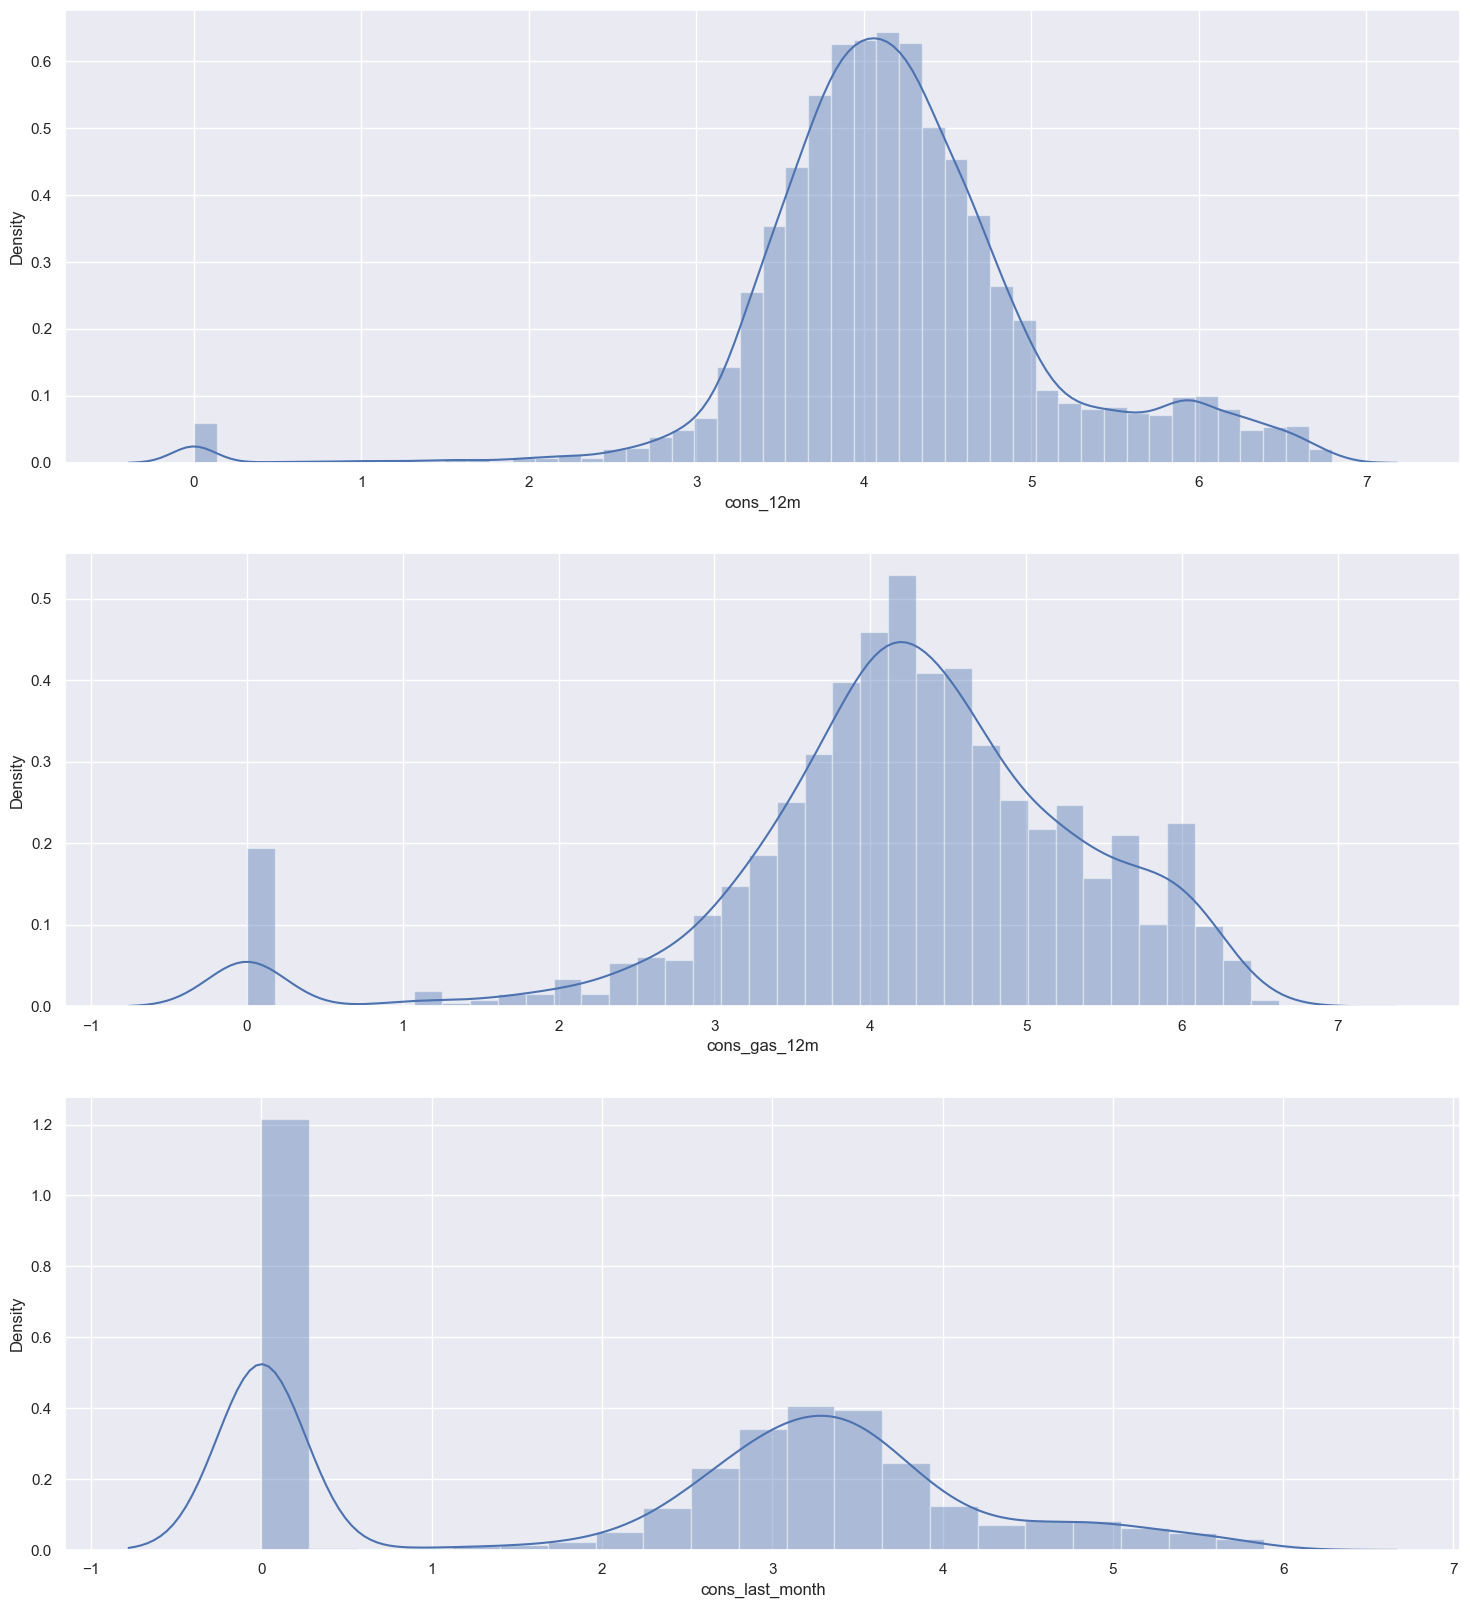

In [34]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

### Correlations

In terms of creating new features and transforming existing ones, it is very much a trial and error situation that requires iteration. Once we train a predictive model we can see which features work and don't work, we will also know how predictive this set of features is. Based on this, we can come back to feature engineering to enhance our model. 

For now, we will leave feature engineering at this point. Another thing that is always useful to look at is how correlated all of the features are within your dataset.

This is important because it reveals the linear relationships between features. We want features to correlate with `churn`, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be independent.

For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption. 

Ideally, you want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

So now let's look at how all the features within the model are correlated.

In [35]:
df.info()
# Display the number of rows and columns
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 87 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          14606 non-null  object 
 1   cons_12m                                    14606 non-null  float64
 2   cons_gas_12m                                14606 non-null  float64
 3   cons_last_month                             14606 non-null  float64
 4   forecast_cons_12m                           14606 non-null  float64
 5   forecast_cons_year                          14606 non-null  float64
 6   forecast_discount_energy                    14606 non-null  float64
 7   forecast_meter_rent_12m                     14606 non-null  float64
 8   forecast_price_energy_off_peak              14606 non-null  float64
 9   forecast_price_energy_peak                  14606 non-null  float64
 10  forecast_p

In [36]:
# Convert boolean columns to 1 and 0
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


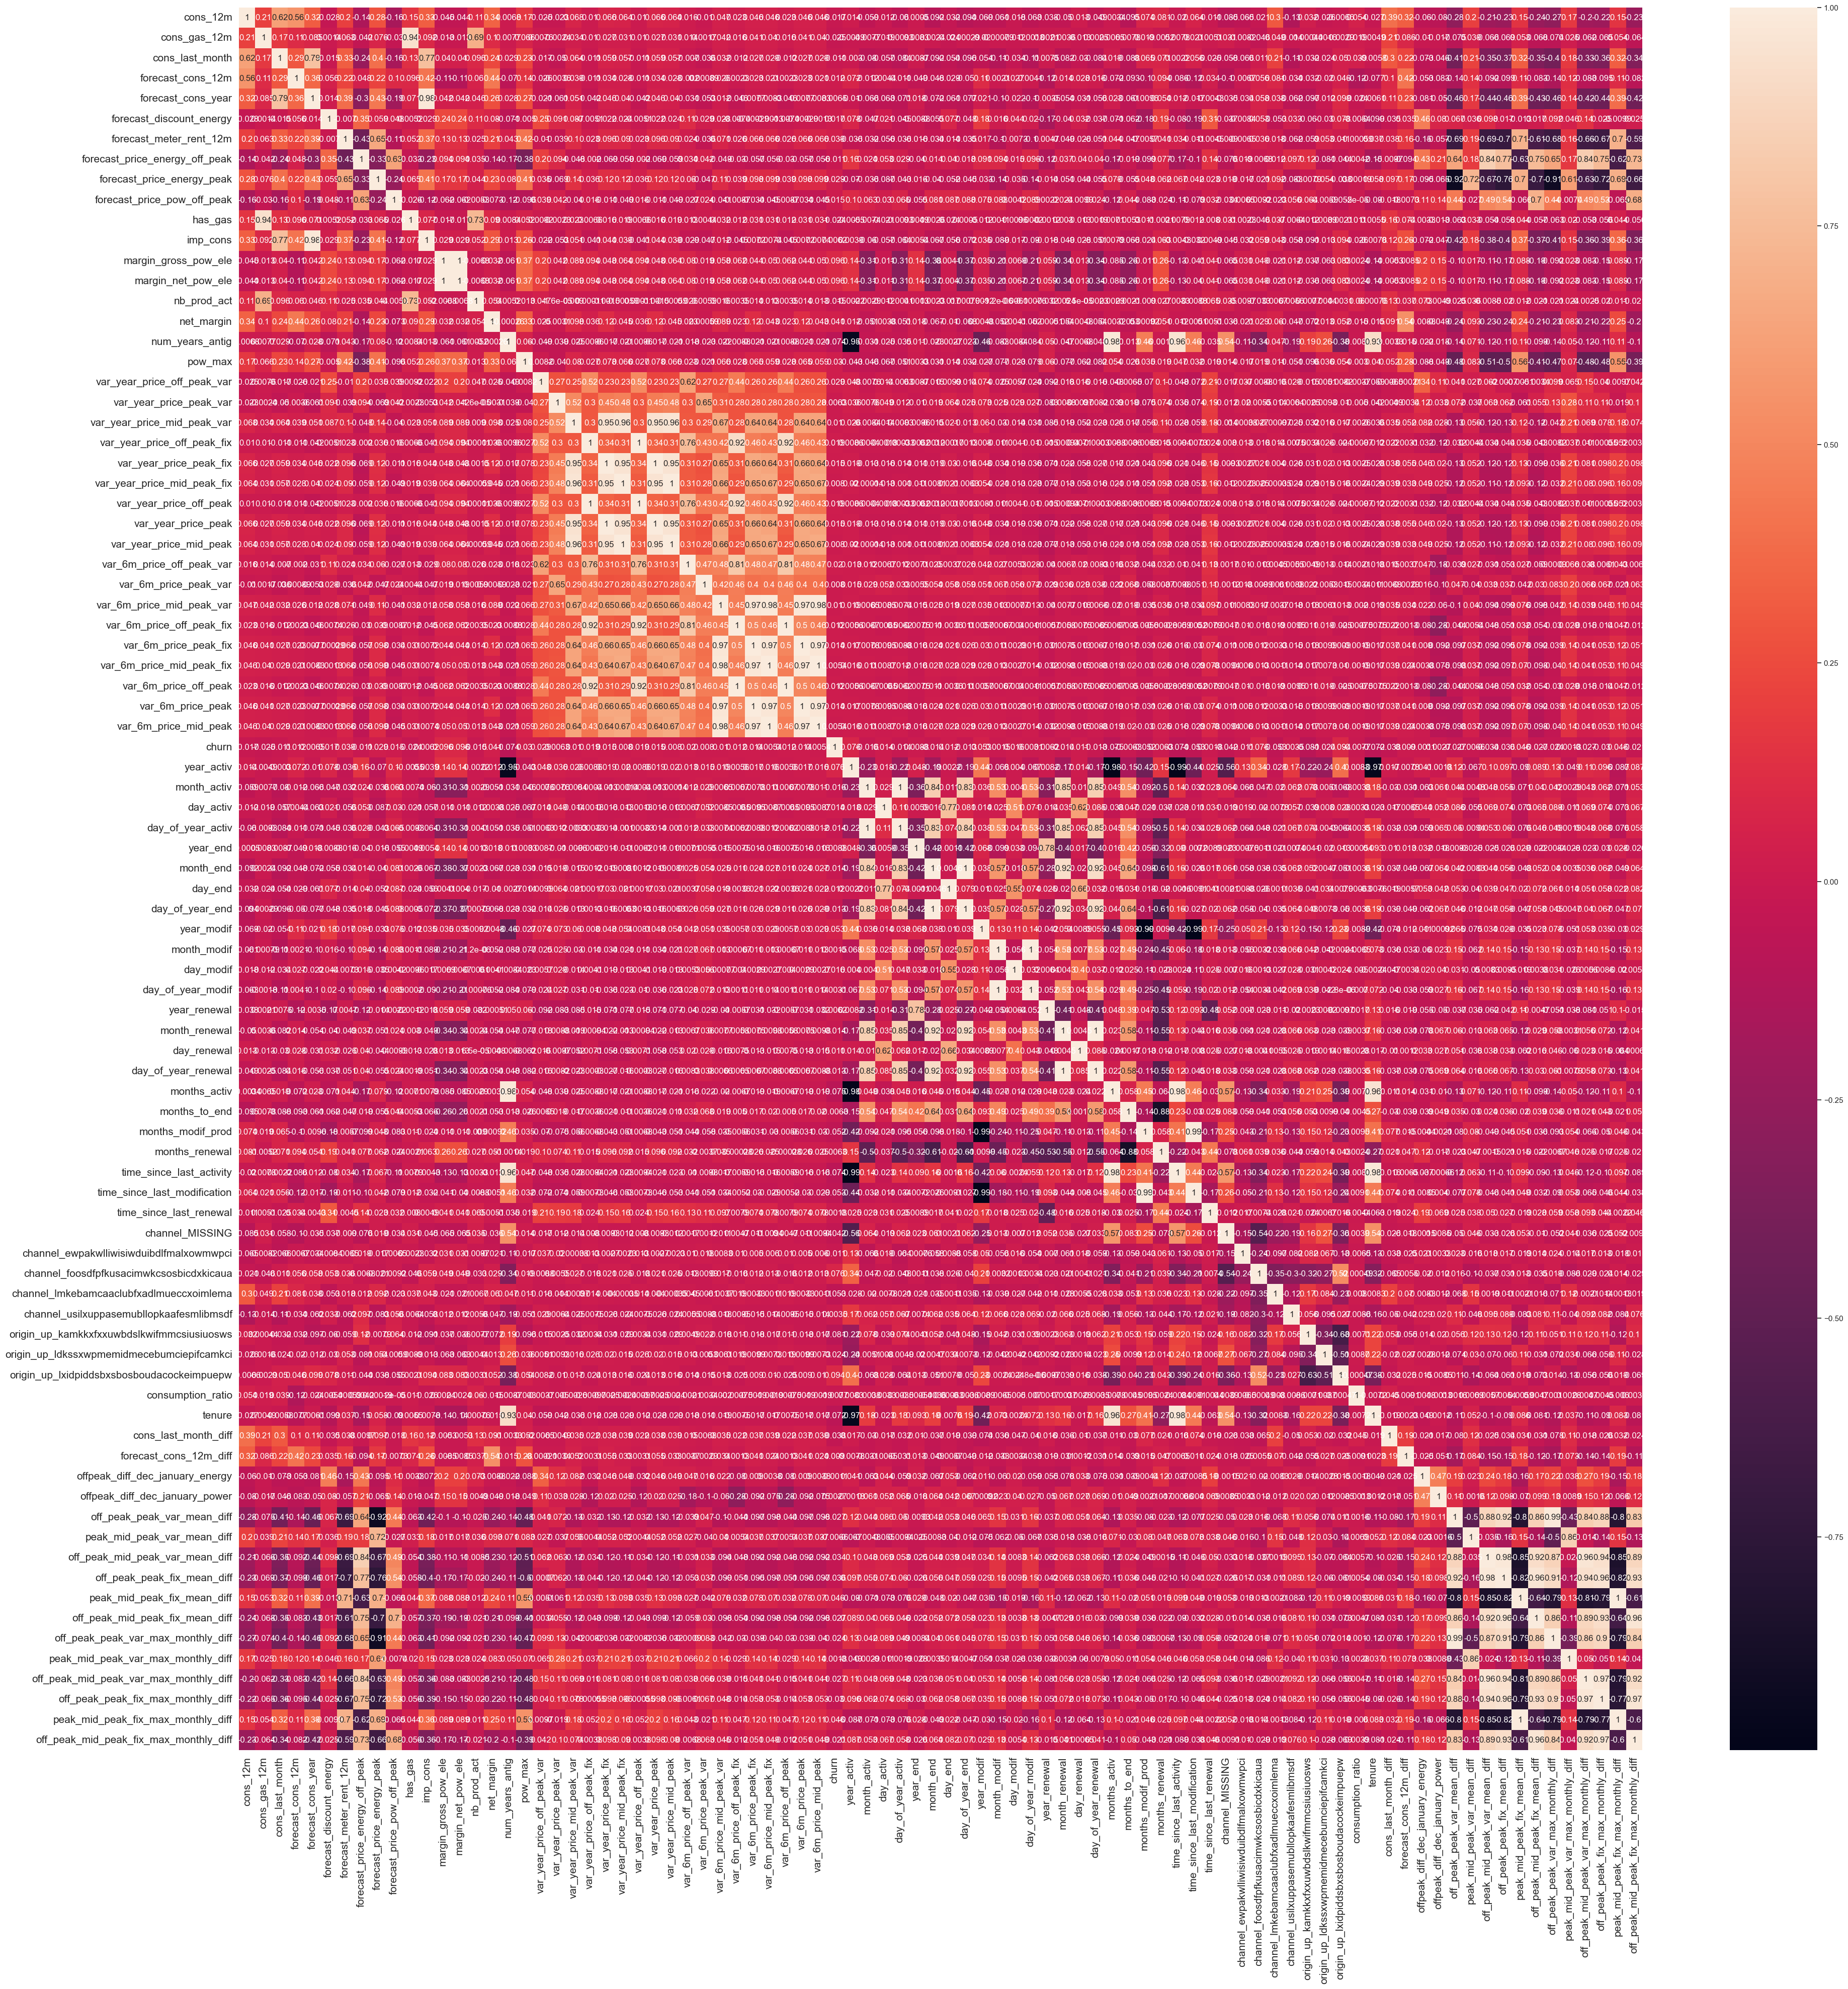

In [37]:
numeric_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
correlation = df[numeric_cols].corr()

# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [38]:
# Set a threshold for correlation
correlation_threshold = 0.75

# Create a list of features to keep
features_to_keep = ['id', 'churn']

# Iterate through the correlation matrix
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if abs(correlation.iloc[i, j]) >= correlation_threshold and correlation.columns[i] != 'id' and correlation.columns[j] != 'id' and correlation.columns[i] != 'churn' and correlation.columns[j] != 'churn':
            features_to_keep.append(correlation.columns[i])
            features_to_keep.append(correlation.columns[j])

# Convert the list to a set to remove duplicates
features_to_keep = list(set(features_to_keep))

# Drop the features with high correlation
df = df[features_to_keep]

# Display the number of rows and columns
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")


The DataFrame has 14606 rows and 60 columns.


In [39]:
price_df.describe()
# Display the number of rows and columns
print(f"The DataFrame has {price_df.shape[0]} rows and {price_df.shape[1]} columns.")

The DataFrame has 193002 rows and 9 columns.


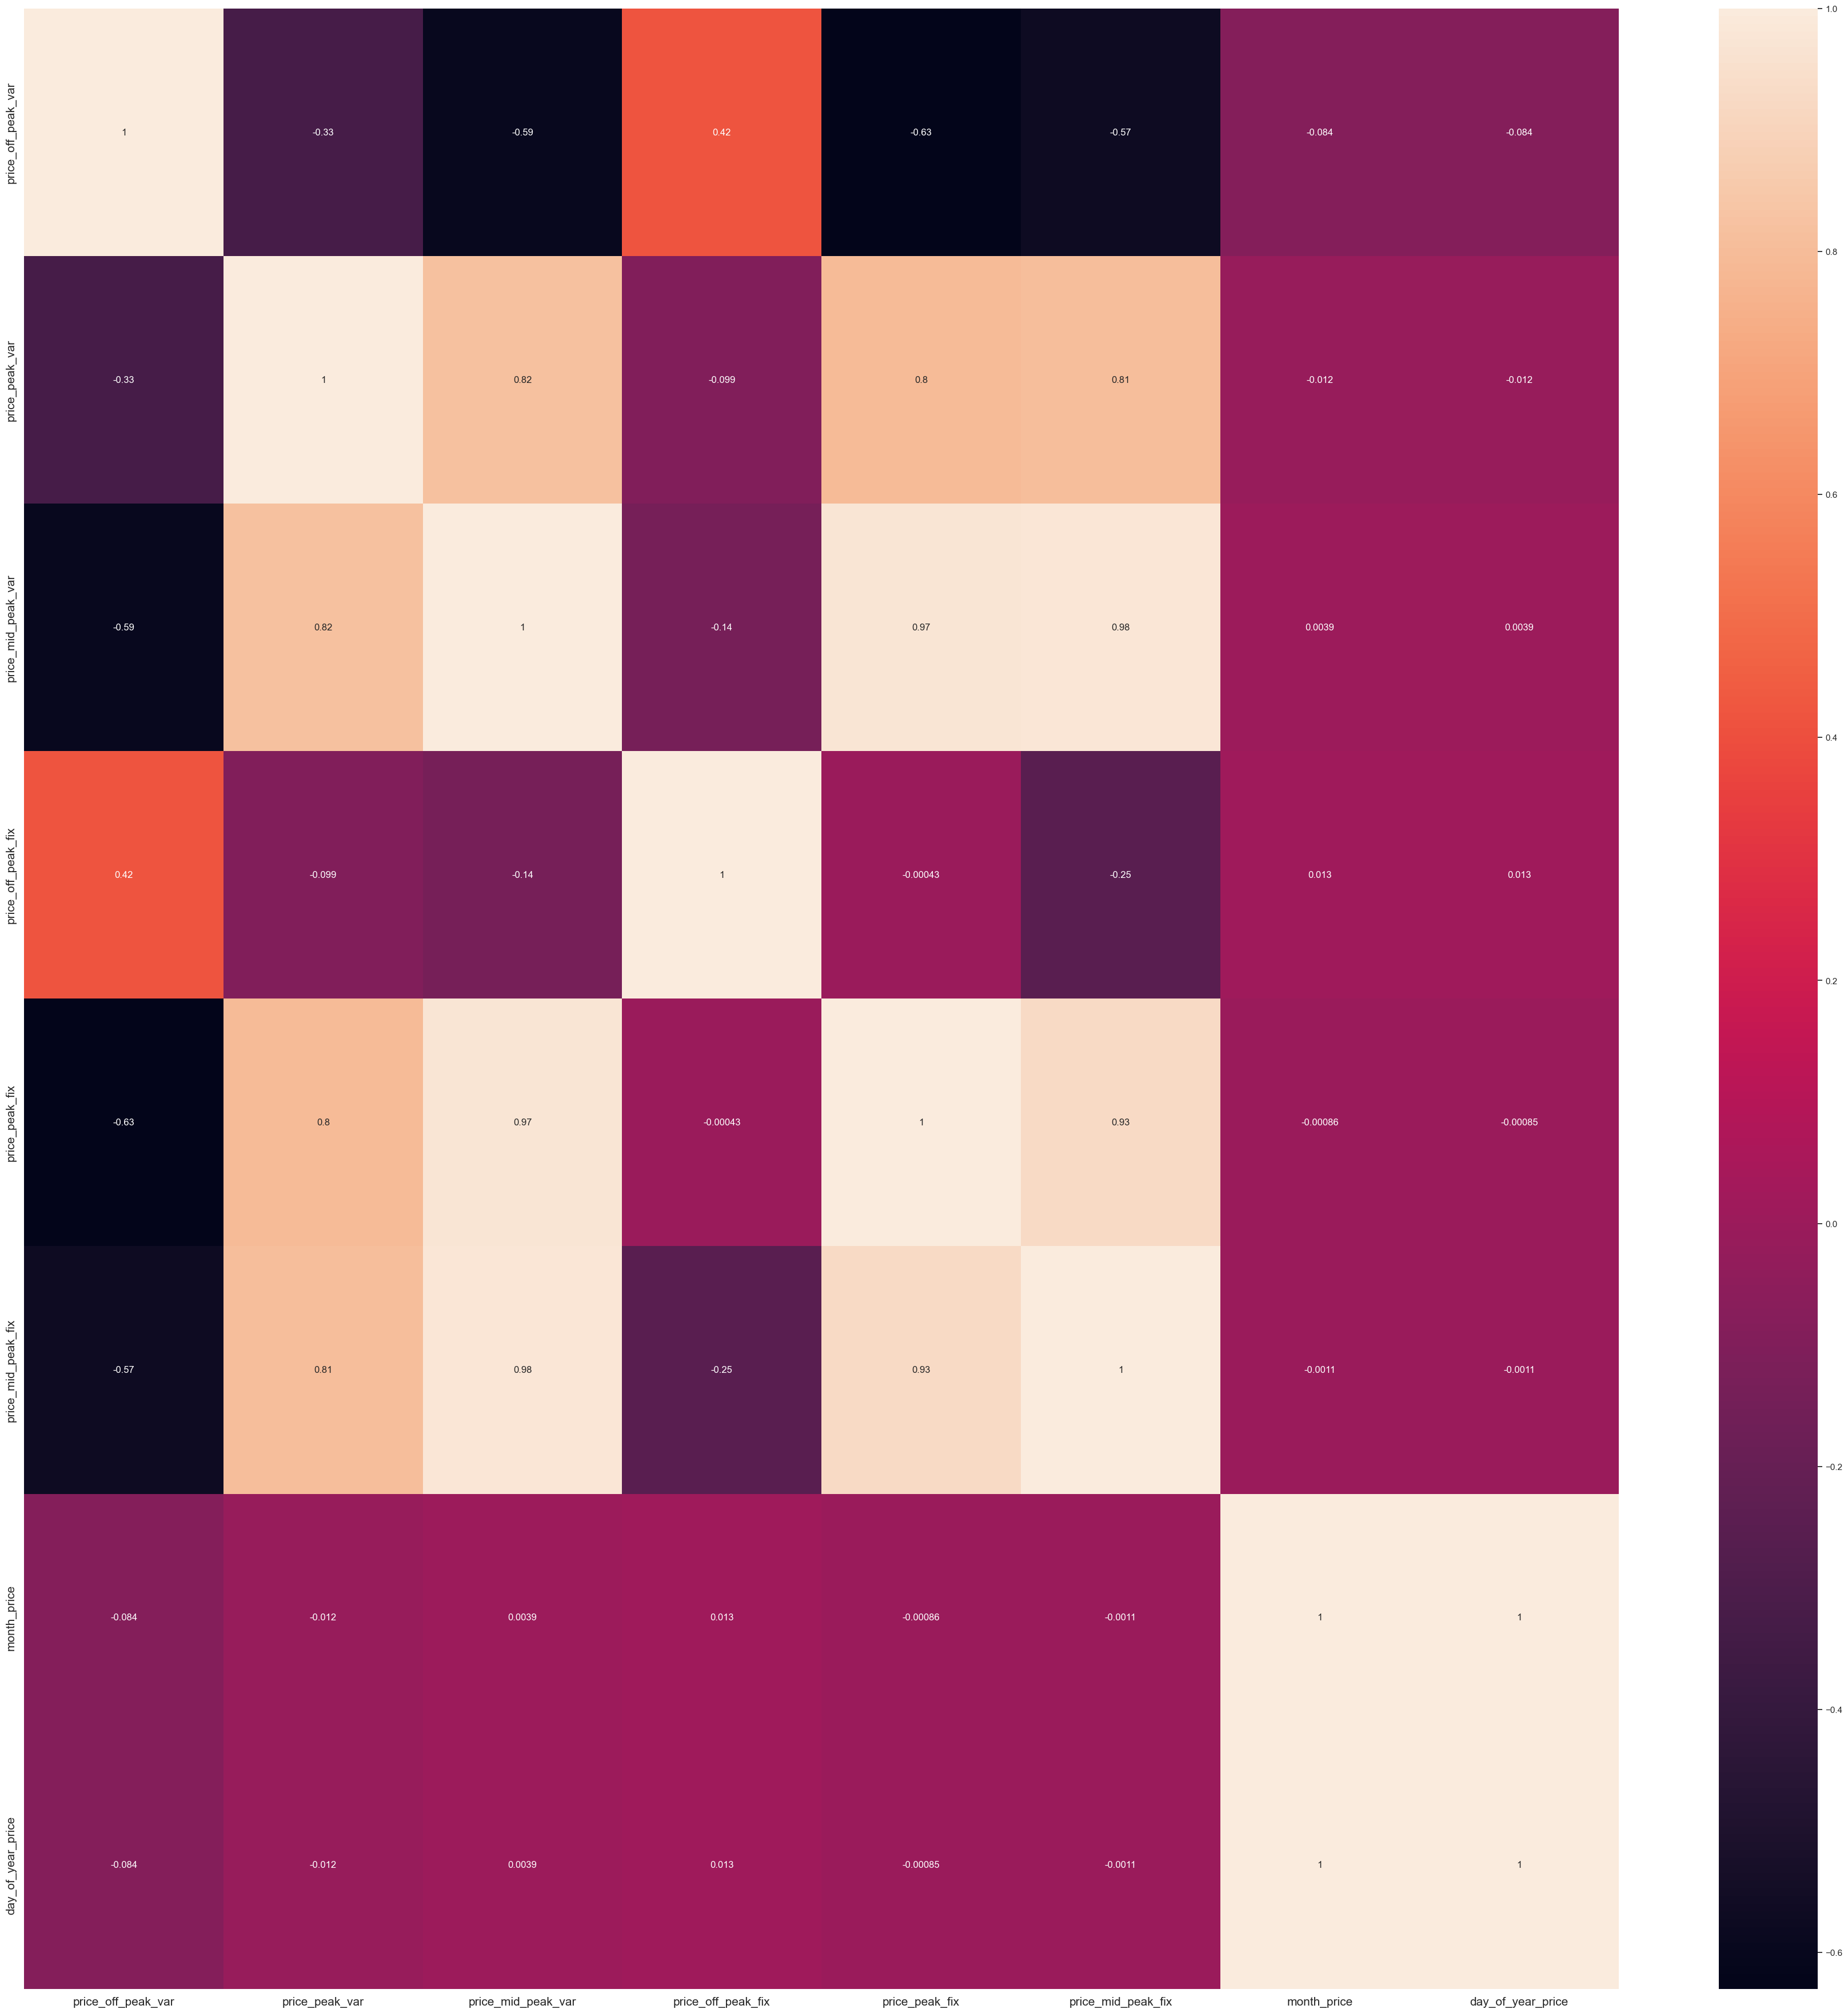

In [40]:
num_cols = price_df.select_dtypes(include=['float64', 'int64', 'int32']).columns
correlation_price= price_df[num_cols].corr()

# Plot correlation_price
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation_price, 
    xticklabels=correlation_price.columns.values,
    yticklabels=correlation_price.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

---
### Modelling

In [41]:
# Merge the dataframes
merged_df = pd.merge(df, price_df, on='id', how='inner')
print(merged_df.dtypes)

# Display the number of rows and columns
print(f"The DataFrame has {merged_df.shape[0]} rows and {merged_df.shape[1]} columns.")


cons_gas_12m                 float64
var_6m_price_off_peak        float64
var_6m_price_off_peak_var    float64
churn                          int64
day_activ                      int32
                              ...   
price_off_peak_fix           float64
price_peak_fix               float64
price_mid_peak_fix           float64
month_price                    int32
day_of_year_price              int32
Length: 68, dtype: object
The DataFrame has 175149 rows and 68 columns.


In [42]:
merged_df = merged_df.drop('id', axis=1)

# Display the number of rows and columns
print(f"The DataFrame has {merged_df.shape[0]} rows and {merged_df.shape[1]} columns.")


The DataFrame has 175149 rows and 67 columns.


In [43]:
merged_df.describe()

cons_gas_12m  var_6m_price_off_peak  var_6m_price_off_peak_var  \
count  175149.000000          175149.000000              175149.000000   
mean        0.779107               0.923424                   0.000025   
std         1.716895              18.224259                   0.000204   
min         0.000000               0.000000                   0.000000   
25%         0.000000               0.000004                   0.000003   
50%         0.000000               0.000011                   0.000004   
75%         0.000000               0.007973                   0.000011   
max         6.618528             525.994268                   0.005543   

               churn      day_activ  var_year_price_off_peak_fix  \
count  175149.000000  175149.000000                 1.751490e+05   
mean        0.097077      13.953428                 6.896396e-01   
std         0.296064       8.882325                 1.101774e+01   
min         0.000000       1.000000                 0.000000e+00   
25%         0.000000       6.000000                 3.436364e-12   
50%         0.000000      13.000000                 6.464760e-03   
75%         0.000000      21.000000                 8.380226e-03   
max         1.000000      31.000000                 3.445652e+02   

       var_6m_price_mid_peak  off_peak_peak_var_mean_diff      month_end  \
count           1.751490e+05                175149.000000  175149.000000   
mean            6.339639e-01                     0.090272       6.651651   
std             5.893126e+00                     0.060897       3.498759   
min             0.000000e+00                     0.000000       1.000000   
25%             0.000000e+00                     0.020536       3.000000   
50%             0.000000e+00                     0.081980       7.000000   
75%             4.860000e-10                     0.148734      10.000000   
max             8.087765e+01                     0.278098      12.000000   

       var_year_price_off_peak  ...  off_peak_peak_fix_mean_diff  \
count            175149.000000  ...                175149.000000   
mean                  0.689681  ...                    33.470056   
std                  11.017856  ...                    13.822671   
min                   0.000000  ...                     0.000000   
25%                   0.000027  ...                    16.275263   
50%                   0.006470  ...                    44.266930   
75%                   0.008384  ...                    44.365079   
max                 344.568812  ...                    59.286190   

       var_year_price_mid_peak  price_off_peak_var  price_peak_var  \
count            175149.000000       175149.000000   175149.000000   
mean                  0.883266            0.142331        0.052059   
std                   5.688243            0.023340        0.050286   
min                   0.000000            0.000000        0.000000   
25%                   0.000000            0.126595        0.000000   
50%                   0.000000            0.146788        0.084213   
75%                   0.000645            0.151635        0.102114   
max                  74.763759            0.280700        0.229788   

       price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
count       175149.000000       175149.000000   175149.000000   
mean             0.028270           42.929009        9.458953   
std              0.036065            4.620531       12.133202   
min              0.000000            0.000000        0.000000   
25%              0.000000           40.728885        0.000000   
50%              0.000000           44.266930        0.000000   
75%              0.072900           44.444710       24.339581   
max              0.114102           59.444710       36.490689   

       price_mid_peak_fix    month_price  day_of_year_price  
count       175149.000000  175149.000000      175149.000000  
mean             6.096434       6.500911         167.527711  
std              7.822250  

In [44]:
# Display the column names
print(f"Column names:{merged_df.columns}")

# Display the number of rows and columns
print(f"The merged DataFrame has {merged_df.shape[0]} rows and {merged_df.shape[1]} columns.")

Column names:Index(['cons_gas_12m', 'var_6m_price_off_peak', 'var_6m_price_off_peak_var',
       'churn', 'day_activ', 'var_year_price_off_peak_fix',
       'var_6m_price_mid_peak', 'off_peak_peak_var_mean_diff', 'month_end',
       'var_year_price_off_peak', 'peak_mid_peak_fix_mean_diff',
       'off_peak_mid_peak_var_mean_diff', 'margin_gross_pow_ele', 'year_modif',
       'time_since_last_modification', 'day_of_year_end',
       'off_peak_peak_var_max_monthly_diff', 'var_year_price_mid_peak_fix',
       'forecast_price_energy_peak', 'var_year_price_peak', 'day_end',
       'time_since_last_activity', 'peak_mid_peak_fix_max_monthly_diff',
       'var_6m_price_peak_fix', 'peak_mid_peak_var_mean_diff', 'month_modif',
       'off_peak_peak_fix_max_monthly_diff', 'imp_cons',
       'var_year_price_mid_peak_var', 'num_years_antig', 'day_of_year_modif',
       'year_end', 'var_6m_price_mid_peak_var', 'has_gas', 'months_to_end',
       'margin_net_pow_ele', 'month_renewal', 'day_of_year_ren

In [45]:
# Save the updated DataFrame to a new CSV file
#merged_df.to_csv('date_data.csv', index=False)


One-hot encoding is a technique used to convert categorical variables into a numerical format that can be provided to our machine learning algorithms to improve their performance.

In one-hot encoding, each category in a categorical variable is represented as a binary vector. For each category, there is a separate binary column in the dataset, and only one of these columns is "hot" (set to 1) for each sample, indicating the presence of that category.

Since during our data analysis phase, we manualy changed the categorical variable while processing, we dont need to run the following snippet. however.

In [46]:
# Encode non-numeric columns
#non_numeric_cols = merged_df.select_dtypes(include=['object']).columns
#for col in non_numeric_cols:
#    encoder = OneHotEncoder()
#    merged_df = pd.concat([merged_df, pd.DataFrame(encoder.fit_transform(merged_df[[col]]).toarray(), columns=[f"{col}_{i}" for i in encoder.categories_[0]], index=merged_df.index)], axis=1)
#    merged_df = merged_df.drop(col, axis=1)

##print(merged_df.dtypes)

# Display the column names
#print(f"Column names:{merged_df.columns}")

# Display the number of rows and columns
#print(f"The merged DataFrame has {merged_df.shape[0]} rows and {merged_df.shape[1]} columns.")


In [47]:
# Save the updated DataFrame to a new CSV file
#merged_df.to_csv('oneHotEncoder.csv', index=False)

In [48]:
# Handle missing values in the target variable
#merged_df = merged_df[~merged_df['churn'].isna()]

# Split the data into features and target
X = merged_df.drop('churn', axis=1)
y = merged_df['churn']


#non_numeric_cols = merged_df.select_dtypes(include=['object']).columns
#print(non_numeric_cols)

In [49]:
import numpy as np
# Handle infinity or large values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler

## Apply Random Over-sampling to balance classes
#ros = RandomOverSampler(random_state=42)
#X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

## Apply Random Under-sampling to balance classes
#rus = RandomUnderSampler(random_state=42)
#X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

## Initialize and train RandomForestClassifier on original and resampled data
#rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
#rf_original.fit(X_train, y_train)

#rf_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
#rf_resampled.fit(X_train_resampled, y_train_resampled)

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140119, 66)
(140119,)
(35030, 66)
(35030,)


In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
feature_names = X.columns


In [53]:
import matplotlib.pyplot as plt

## 1. Inspect the feature importances
# This helps understand which features are contributing the most to the predictions

print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"{feature_names[i]}: {importance:.4f}")


Feature Importances:
cons_gas_12m: 0.0059
var_6m_price_off_peak: 0.0146
var_6m_price_off_peak_var: 0.0119
day_activ: 0.0076
var_year_price_off_peak_fix: 0.0073
var_6m_price_mid_peak: 0.0054
off_peak_peak_var_mean_diff: 0.0222
month_end: 0.0205
var_year_price_off_peak: 0.0202
peak_mid_peak_fix_mean_diff: 0.0124
off_peak_mid_peak_var_mean_diff: 0.0301
margin_gross_pow_ele: 0.1231
year_modif: 0.0061
time_since_last_modification: 0.0235
day_of_year_end: 0.0370
off_peak_peak_var_max_monthly_diff: 0.0104
var_year_price_mid_peak_fix: 0.0024
forecast_price_energy_peak: 0.0127
var_year_price_peak: 0.0130
day_end: 0.0034
time_since_last_activity: 0.0353
peak_mid_peak_fix_max_monthly_diff: 0.0027
var_6m_price_peak_fix: 0.0105
peak_mid_peak_var_mean_diff: 0.0056
month_modif: 0.0041
off_peak_peak_fix_max_monthly_diff: 0.0047
imp_cons: 0.0046
var_year_price_mid_peak_var: 0.0021
num_years_antig: 0.0314
day_of_year_modif: 0.0161
year_end: 0.0012
var_6m_price_mid_peak_var: 0.0041
has_gas: 0.0020
months

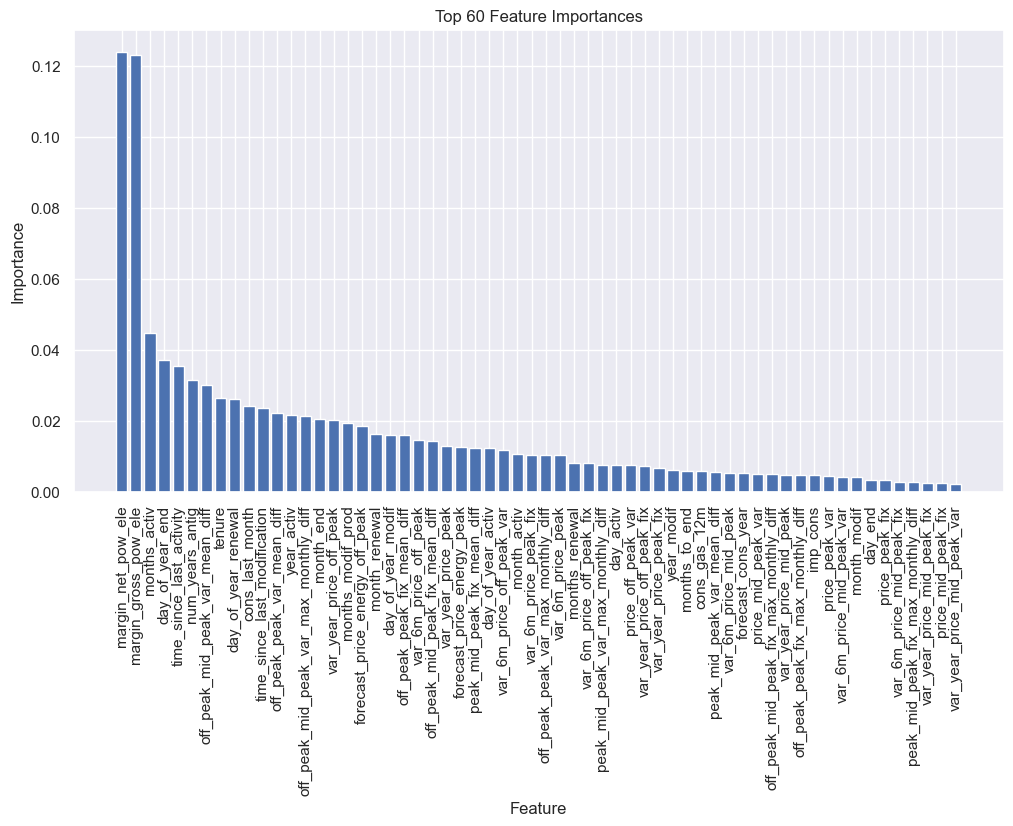

In [54]:
## 2. Visualize the feature importances
# Sort the feature importances in descending order
sorted_importances = sorted(zip(feature_importances, feature_names), reverse=True)

# Get the top 60 features
top_features = [name for _, name in sorted_importances[:60]]
top_importances = [importance for importance, _ in sorted_importances[:60]]

# Create the visualization
plt.figure(figsize=(12, 6))
plt.bar(top_features, top_importances)
plt.xticks(rotation=90)
plt.title("Top 60 Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [55]:
# Evaluate the RandomForestClassifier on the test set
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("RandomForestClassifier")
print("Evaluation Metrics on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy:")
print(f"Mean: {scores.mean():.4f} (+/- {scores.std():.4f})")

# Evaluate the RandomForestClassifier using AUC-ROC and AUC-PR
y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

print("\nEvaluation Metrics for AUC-ROC and AUC-PR on Test Set:")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"AUC-PR: {pr_auc:.4f}")

Evaluation Metrics on Test Set:
Accuracy: 0.9059
Precision: 1.0000
Recall: 0.0081
F1-score: 0.0161

Cross-Validation Accuracy:
Mean: 0.9032 (+/- 0.0003)

Evaluation Metrics for AUC-ROC and AUC-PR on Test Set:
AUC-ROC: 0.7134
AUC-PR: 0.3034


In [56]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

feature_importances = gb.feature_importances_
feature_names = X.columns

## 1. Inspect the feature importances
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"{feature_names[i]}: {importance:.4f}")



Feature Importances:
cons_gas_12m: 0.0189
var_6m_price_off_peak: 0.0168
var_6m_price_off_peak_var: 0.0138
day_activ: 0.0099
var_year_price_off_peak_fix: 0.0009
var_6m_price_mid_peak: 0.0032
off_peak_peak_var_mean_diff: 0.0184
month_end: 0.0053
var_year_price_off_peak: 0.0237
peak_mid_peak_fix_mean_diff: 0.0012
off_peak_mid_peak_var_mean_diff: 0.0320
margin_gross_pow_ele: 0.0252
year_modif: 0.0009
time_since_last_modification: 0.0243
day_of_year_end: 0.1163
off_peak_peak_var_max_monthly_diff: 0.0035
var_year_price_mid_peak_fix: 0.0018
forecast_price_energy_peak: 0.0484
var_year_price_peak: 0.0061
day_end: 0.0107
time_since_last_activity: 0.0255
peak_mid_peak_fix_max_monthly_diff: 0.0000
var_6m_price_peak_fix: 0.0012
peak_mid_peak_var_mean_diff: 0.0067
month_modif: 0.0020
off_peak_peak_fix_max_monthly_diff: 0.0022
imp_cons: 0.0111
var_year_price_mid_peak_var: 0.0070
num_years_antig: 0.0031
day_of_year_modif: 0.0217
year_end: 0.0000
var_6m_price_mid_peak_var: 0.0109
has_gas: 0.0000
months

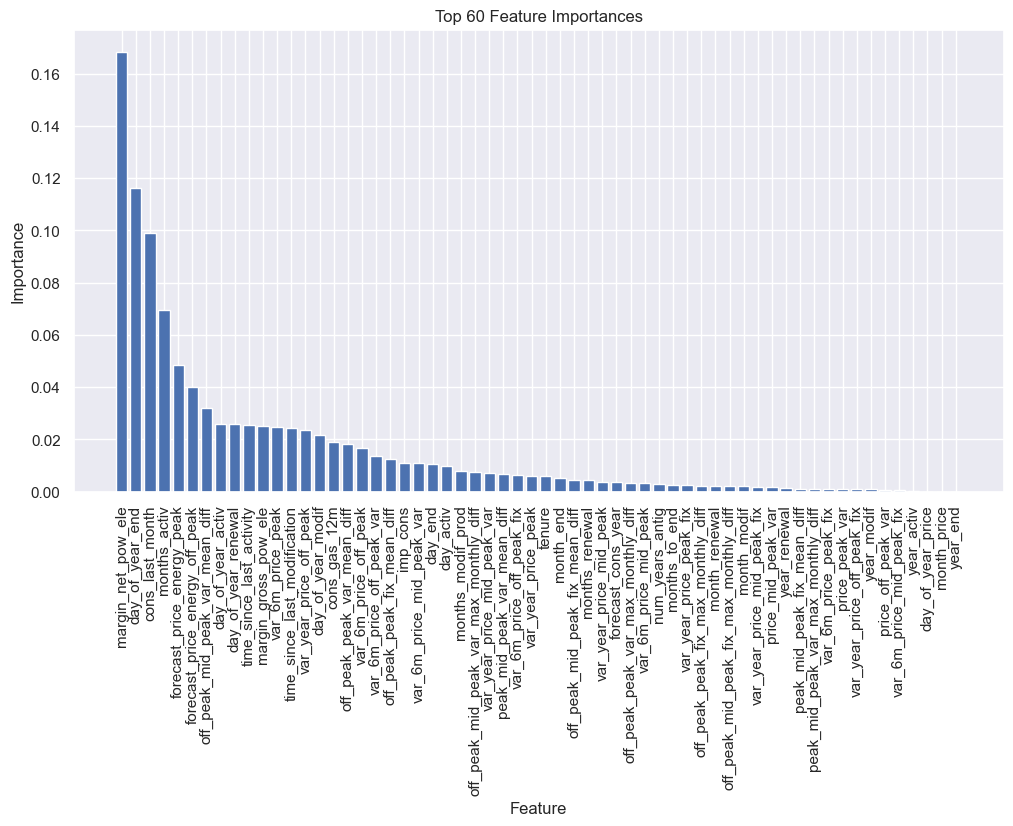

In [57]:
## 2. Visualize the feature importances
# Sort the feature importances in descending order
sorted_importances = sorted(zip(feature_importances, feature_names), reverse=True)

# Get the top 60 features
top_features = [name for _, name in sorted_importances[:60]]
top_importances = [importance for importance, _ in sorted_importances[:60]]

# Create the visualization
plt.figure(figsize=(12, 6))
plt.bar(top_features, top_importances)
plt.xticks(rotation=90)
plt.title("Top 60 Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [58]:
# Evaluate the Gradient Boosting Classifier on the test set
y_pred = gb.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Gradient Boosting Classifier")
print("Evaluation Metrics on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Perform cross-validation
scores = cross_val_score(gb, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy:")
print(f"Mean: {scores.mean():.4f} (+/- {scores.std():.4f})")

# Evaluate the Gradient Boosting Classifier using AUC-ROC and AUC-PR
y_pred_proba = gb.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

print("\nEvaluation Metrics for AUC-ROC and AUC-PR on Test Set:")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"AUC-PR: {pr_auc:.4f}")


Evaluation Metrics on Test Set:
Accuracy: 0.9087
Precision: 1.0000
Recall: 0.0379
F1-score: 0.0730

Cross-Validation Accuracy:
Mean: 0.9028 (+/- 0.0016)

Evaluation Metrics for AUC-ROC and AUC-PR on Test Set:
AUC-ROC: 0.7550
AUC-PR: 0.3819
